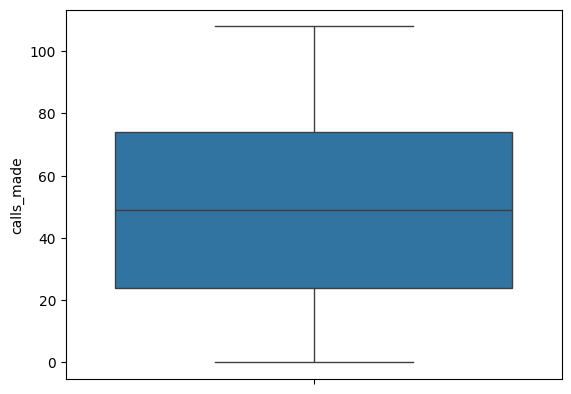

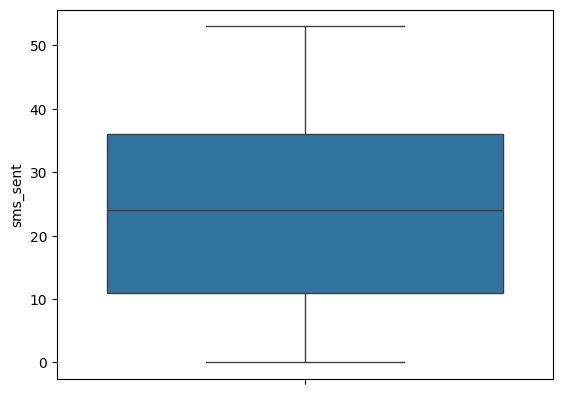

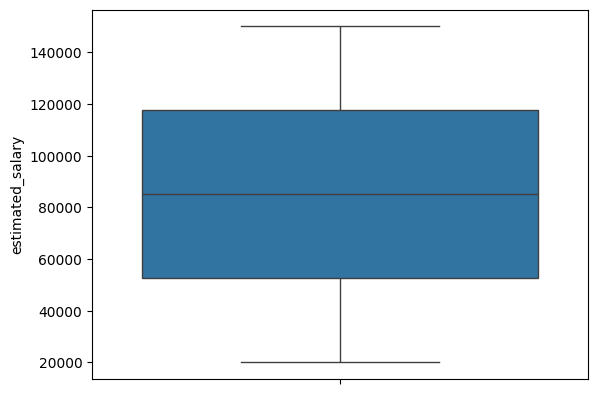

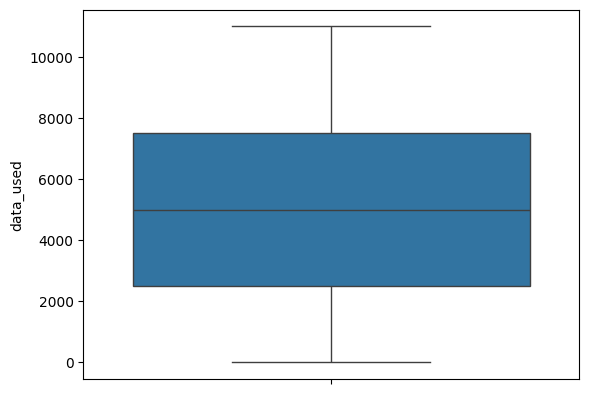

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn',
       'estimated_salary_standardized', 'calls_made_standardized',
       'sms_sent_standardized', 'data_used_standardized',
       'estimated_salary_normalized', 'calls_made_normalized',
       'sms_sent_normalized', 'data_used_normalized', 'calls_made_log',
       'sms_sent_log', 'estimated_salary_log', 'data_used_log'],
      dtype='object')
   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read_tc=pd.read_csv('/content/telecom_churn.csv')
read_tc.head(10)

#to check for missing values
read_tc.isnull().sum()

#to check for negative  values
(read_tc['estimated_salary']<0).any()

(read_tc['calls_made']<0).any()

(read_tc['sms_sent']<0).any()

(read_tc['data_used']<0).any()

#to handle negative  values
read_tc['estimated_salary']=read_tc['estimated_salary'].abs()
read_tc['calls_made']=read_tc['calls_made'].abs()
read_tc['sms_sent']=read_tc['sms_sent'].abs()
read_tc['data_used']=read_tc['data_used'].abs()


(read_tc['estimated_salary']<0).any()
(read_tc['calls_made']<0).any()
(read_tc['sms_sent']<0).any()
(read_tc['data_used']<0).any()

#to check the data type of each column.
read_tc.dtypes


#to scale each column  for faster training


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Select the numerical columns you want to scale
targeted_columns=['estimated_salary','calls_made','sms_sent','data_used']


#Scaling

scaled_stand_targeted_columns=read_tc[targeted_columns].copy()
scaled_stand_columns=StandardScaler().fit_transform(scaled_stand_targeted_columns)

# Create a new DataFrame with the scaled values (optional, but good for inspection)
#scaled_stand_columns = pd.DataFrame(scaled_stand_columns, columns=targeted_columns)


# Create new columns in the original DataFrame for standardized values
scaled_read_tc_standard = pd.DataFrame(scaled_stand_columns, columns=[col + '_standardized' for col in targeted_columns])
read_tc = pd.concat([read_tc, scaled_read_tc_standard], axis=1)
read_tc.head(10)

#Normalization

normalized_columns= MinMaxScaler().fit_transform(scaled_stand_targeted_columns)


# Create a new DataFrame with the scaled values (optional)
#normalized_columns = pd.DataFrame(normalized_columns, columns=targeted_columns)



# Create new columns in the original DataFrame for normalized values
scaled_read_tc_minmax = pd.DataFrame(normalized_columns, columns=[col + '_normalized' for col in targeted_columns])
read_tc = pd.concat([read_tc, scaled_read_tc_minmax], axis=1)


read_tc.head(10)





# Handle Outliers (Important for Logistic Regression):


# check for Outliers in  calls_made
sns.boxplot(data=read_tc['calls_made'])
plt.show()


# check for Outliers in  sms_sent
sns.boxplot(data=read_tc['sms_sent'])
plt.show()



# check for Outliers in  estimated_salary
sns.boxplot(data=read_tc['estimated_salary'])
plt.show()



# check for Outliers in  data_used

sns.boxplot(data=read_tc['data_used'])
plt.show()



 # feature transformations using ( logarithmic transformation ) on the feature might help to  linearize relationships, making it easier for linear models like Logistic Regression to learn.
epsilon = 1e-5
read_tc['calls_made_log'] = np.log(read_tc['calls_made'] + epsilon)
read_tc['sms_sent_log'] = np.log(read_tc['sms_sent'] + epsilon)
read_tc['estimated_salary_log'] = np.log(read_tc['estimated_salary'] + epsilon)
read_tc['data_used_log'] = np.log(read_tc['data_used'] + epsilon)

read_tc['calls_made_log']
read_tc['sms_sent_log']
read_tc['estimated_salary_log']
read_tc['data_used_log']

print(read_tc.columns)
print(read_tc.head()) # To see the first few rows with the new columns
